In [1]:
ENV["GKS_ENCODING"] = "utf-8"
using Plots
using LadderDGA
using Logging

io = stdout
metafmt(level::Logging.LogLevel, _module, group, id, file, line) = Logging.default_metafmt(level, nothing, group,     id, nothing, nothing)
logger = ConsoleLogger(io, Logging.Info, meta_formatter=metafmt, show_limited=true, right_justify=0)
global_logger(logger);

┌ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b]
└ @ Base loading.jl:1317


# Setup and read DMFT quantities

In [2]:
cfg_file = "$(@__DIR__)/../../lDGA_test_runs/config_large2.toml";

mP, sP, env, kGrids, qGrids, qGridLoc, freqRed_map, freqList, freqList_min, parents, ops, nFermi, nBose, shift, base, offset = readConfig(cfg_file)
kG = kGrids[1]
qG = qGrids[1]
νGrid, sumHelper_f, impQ_sp, impQ_ch, GImp_fft, GLoc_fft, Σ_loc, FUpDo, gImp, gLoc = setup_LDGA(kG, freqList, mP, sP, env);

[ Info: Reading Inputs...
[ Warning: TODO: check beta consistency, config <-> g0man, chi_dir <-> gamma dir
[ Warning: assuming ED calculation for E_kin!! gm_wim and hubb.andpar need to be present
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities iwth ranges are:
│ χLoc_sp(2:100) = 0.315, χLoc_ch(2:100) = 0.1071 
└ sum χupup check: 0.2537931277707 ?≈? 0.25"


In [3]:
iνₙ = LadderDGA.iν_array(mP.β, 0:(sP.n_iν-1))
iνₙ, GImp    = LadderDGA.readGImp(env.inputDir * "/gm_wim", only_positive=true)
ϵₖ, Vₖ, μ    = LadderDGA.read_anderson_parameters(env.inputDir * "/hubb.andpar");
E_kin_ED, E_pot_ED  = LadderDGA.calc_E_ED(iνₙ[1:20], ϵₖ, Vₖ, GImp[1:20], mP)
E_kin_ED_large, E_pot_ED_large  = LadderDGA.calc_E_ED(iνₙ[1:5000], ϵₖ, Vₖ, GImp[1:5000], mP)

(-0.3343843498552166, 0.1492328122417026)

In [4]:
ep, ek = LadderDGA.calc_E(Σ_loc[1:sP.n_iν], qG, mP, sP);

In [7]:
usable_ω = intersect(impQ_sp.usable_ω, impQ_ch.usable_ω);

In [8]:
iωn = 1im .* 2 .* (-sP.n_iω:sP.n_iω) .* π ./ mP.β;

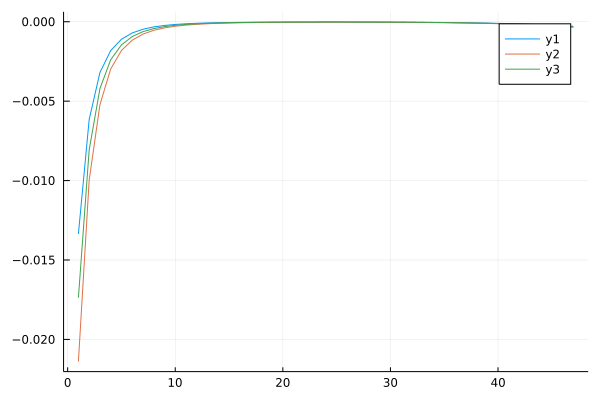

In [9]:
plot(real(impQ_sp.χ_ω  .- E_kin_ED_large ./  (iωn .^ 2))[55:end])
plot!(real(impQ_ch.χ_ω  .- E_kin_ED_large ./  (iωn .^ 2))[55:end])
plot!(real(0.5*(impQ_sp.χ_ω .+ impQ_ch.χ_ω ) .-  E_kin_ED_large ./ (iωn .^ 2))[55:end])

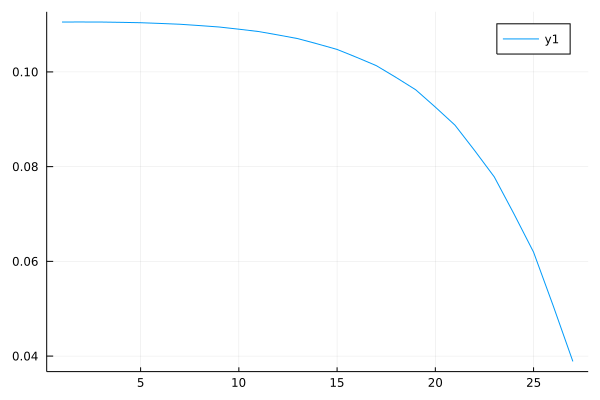

In [10]:
plot(real(0.5*(impQ_sp.χ_ω .+ impQ_ch.χ_ω ) .*  E_kin_ED_large .* (iωn .^ 2))[75:end])